In [10]:
#Initialization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats
df = pd.read_csv('../data/baseball.csv')

df.head(10)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
5,CHW,AL,2012,748,676,85,0.318,0.422,0.255,0,NaN,NaN,162,0.319,0.405
6,CIN,NL,2012,669,588,97,0.315,0.411,0.251,1,2.0,4.0,162,0.305,0.390
7,CLE,AL,2012,667,845,68,0.324,0.381,0.251,0,NaN,NaN,162,0.336,0.430
8,COL,NL,2012,758,890,64,0.330,0.436,0.274,0,NaN,NaN,162,0.357,0.470
9,DET,AL,2012,726,670,88,0.335,0.422,0.268,1,6.0,2.0,162,0.314,0.402


### Acronyms
RS = Runs Scored\
RA = Run average\
W = Wins\
OBP = On-base percentage\
SLG = Slugging percentage\
BA = Batting average\
G = Games\
OOBP = Opponents on-base percentage\
OSLG = Opponents slugging percentage

In [2]:
#Checking to see the amount of nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [3]:
#Checking for dupes
print(df.duplicated().sum())
df.duplicated()

0


0       False
1       False
2       False
3       False
4       False
        ...  
1227    False
1228    False
1229    False
1230    False
1231    False
Length: 1232, dtype: bool

In [4]:
print(df['Team'].duplicated().sum())
df.duplicated()

1193


0       False
1       False
2       False
3       False
4       False
        ...  
1227    False
1228    False
1229    False
1230    False
1231    False
Length: 1232, dtype: bool

In [5]:
df['Team'].value_counts()

HOU    47
DET    47
NYY    47
NYM    47
MIN    47
LAD    47
SFG    47
PIT    47
PHI    47
STL    47
CLE    47
CIN    47
CHW    47
CHC    47
BOS    47
BAL    47
ATL    43
OAK    41
KCR    40
SDP    40
MIL    39
TEX    37
TOR    33
SEA    33
MON    32
CAL    28
COL    18
FLA    17
ARI    15
LAA    11
TBD    10
WSA    10
WSN     8
ANA     8
KCA     6
TBR     5
MLN     4
MIA     1
SEP     1
Name: Team, dtype: int64

In [6]:
#Creating two separate Dataframes for the different leagues
Aleague = df[df['League']=='AL'].copy()
Nleague = df[df['League']=='NL'].copy()
Aleague

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
5,CHW,AL,2012,748,676,85,0.318,0.422,0.255,0,NaN,NaN,162,0.319,0.405
7,CLE,AL,2012,667,845,68,0.324,0.381,0.251,0,NaN,NaN,162,0.336,0.430
9,DET,AL,2012,726,670,88,0.335,0.422,0.268,1,6.0,2.0,162,0.314,0.402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,KCA,AL,1962,745,837,72,0.332,0.386,0.263,0,NaN,NaN,162,NaN,NaN
1221,LAA,AL,1962,718,706,86,0.325,0.380,0.250,0,NaN,NaN,162,NaN,NaN
1223,MIN,AL,1962,798,713,91,0.338,0.412,0.260,0,NaN,NaN,163,NaN,NaN
1226,NYY,AL,1962,817,680,96,0.337,0.426,0.267,1,2.0,1.0,162,NaN,NaN


In [7]:
Nleague

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
6,CIN,NL,2012,669,588,97,0.315,0.411,0.251,1,2.0,4.0,162,0.305,0.390
8,COL,NL,2012,758,890,64,0.330,0.436,0.274,0,NaN,NaN,162,0.357,0.470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,NYM,NL,1962,617,948,40,0.318,0.361,0.240,0,NaN,NaN,161,NaN,NaN
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN


In [8]:
#Sorting it for convenience
Aleague.sort_values(by='Team')
Nleague.sort_values(by='Team')
Aleague

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
5,CHW,AL,2012,748,676,85,0.318,0.422,0.255,0,NaN,NaN,162,0.319,0.405
7,CLE,AL,2012,667,845,68,0.324,0.381,0.251,0,NaN,NaN,162,0.336,0.430
9,DET,AL,2012,726,670,88,0.335,0.422,0.268,1,6.0,2.0,162,0.314,0.402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,KCA,AL,1962,745,837,72,0.332,0.386,0.263,0,NaN,NaN,162,NaN,NaN
1221,LAA,AL,1962,718,706,86,0.325,0.380,0.250,0,NaN,NaN,162,NaN,NaN
1223,MIN,AL,1962,798,713,91,0.338,0.412,0.260,0,NaN,NaN,163,NaN,NaN
1226,NYY,AL,1962,817,680,96,0.337,0.426,0.267,1,2.0,1.0,162,NaN,NaN


In [9]:
Nleague

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
6,CIN,NL,2012,669,588,97,0.315,0.411,0.251,1,2.0,4.0,162,0.305,0.390
8,COL,NL,2012,758,890,64,0.330,0.436,0.274,0,NaN,NaN,162,0.357,0.470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,NYM,NL,1962,617,948,40,0.318,0.361,0.240,0,NaN,NaN,161,NaN,NaN
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN


<Axes: xlabel='Year'>

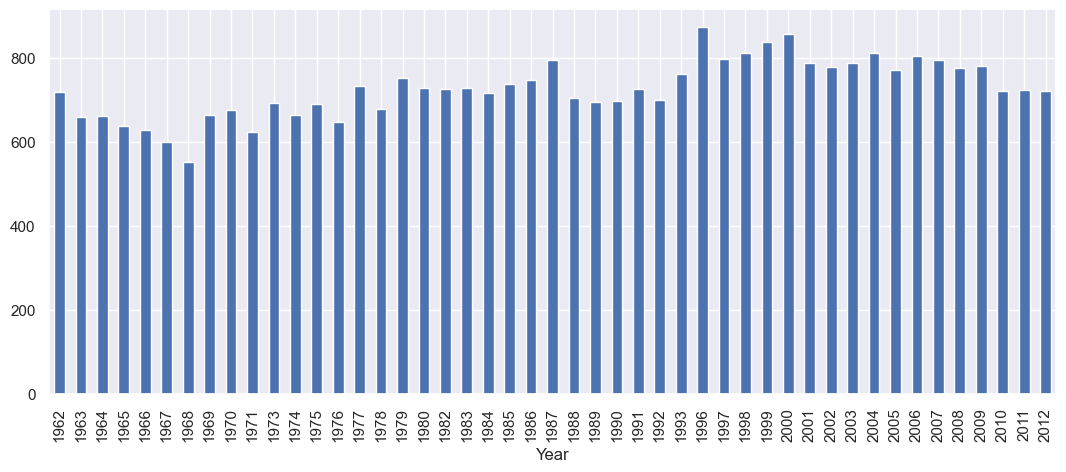

In [11]:
#Checking average RS for each year for AL separately
AL_y_rs = Aleague.groupby('Year')['RS'].mean()
AL_y_rs.plot(kind='bar',
       figsize=(13,5))

<Axes: xlabel='Year'>

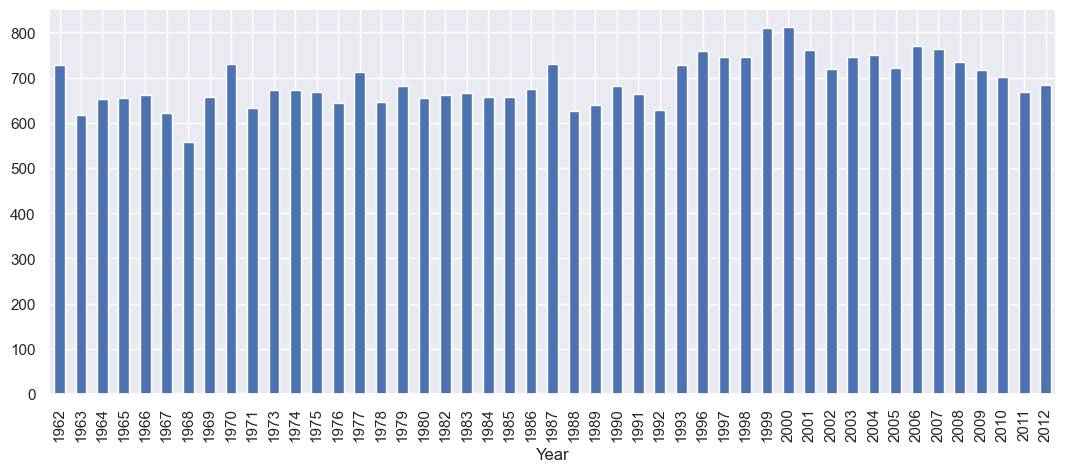

In [12]:
#Checking average RS for each year for NL separately
NL_y_rs = Nleague.groupby('Year')['RS'].mean()
NL_y_rs.plot(kind='bar',
       figsize=(13,5))

<Axes: xlabel='Team'>

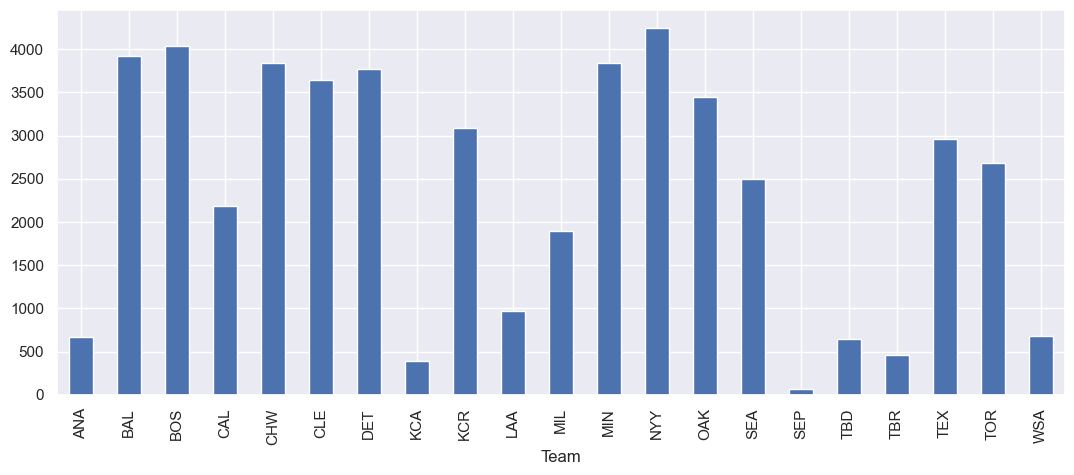

In [15]:
#Checking average RS for each year for AL separately
AL_t_w = Aleague.groupby('Team')['W'].sum()
AL_t_w.plot(kind='bar',
       figsize=(13,5))

<Axes: xlabel='Team'>

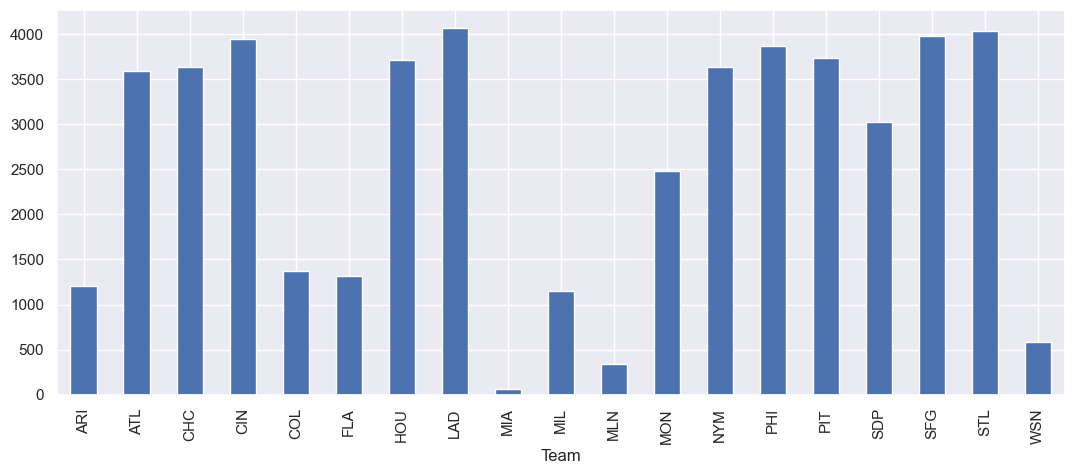

In [16]:
#Checking average RS for each year for AL separately
NL_t_w = Nleague.groupby('Team')['W'].sum()
NL_t_w.plot(kind='bar',
       figsize=(13,5))